In [37]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

In [2]:
data=pd.read_csv("diabetes.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
data.shape

(100000, 9)

In [70]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [71]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0
99999,0,57.0,0,0,1,22.43,6.6,90,0


In [4]:
#checking duplicates(duplicates in data can cause problem or can help you in certain ways , but to not complicate our problem we will remove it)
duplicates_in_data=data.duplicated().sum()
print(duplicates_in_data)

3854


In [5]:
#This will remove all the duplicates in the dataset
data=data.drop_duplicates()

In [6]:
data.info() #from this we can get a lot of knowdelge regarding our dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [7]:
unique_values=data.nunique() # this will help us in finding how many unique values are present in each column
print(unique_values)

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


In [8]:
data.isna().sum() # this will help us to know in which columns values are missing(if any)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
data.gender.value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [10]:
# remove `other` as it's quantity is very small as compared to Female and Male
data.drop(data[data['gender']=='Other'].index, inplace=True)

D:\\ipykernel_21032\147200502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['gender']=='Other'].index, inplace=True)


In [11]:
data.gender.value_counts() #now we have only 2 genders 

Female    56161
Male      39967
Name: gender, dtype: int64

In [12]:
data.smoking_history.value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

# exploring the data in graphical and numerical way

In [13]:
data.describe()# this will help us get numerical observation over our dataset

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
# from this we can gain insights on things like:
# max age : 80
# max bmi : 95.69
# max HbA1c_level : 9.0
# max blood_glucose_level : 300

## visualizing male vs female in the dataset

Text(0, 0.5, 'count')

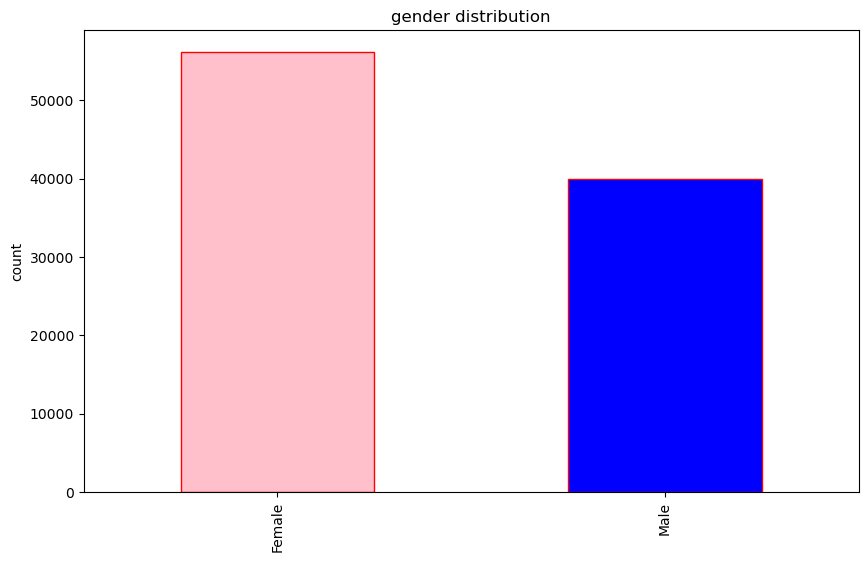

In [15]:
data["gender"].value_counts().plot(kind="bar", color =["pink", "blue"],edgecolor=["red","red"],figsize=(10,6))
plt.title("gender distribution")
plt.ylabel("count")

## visualizing age distribution in our dataset

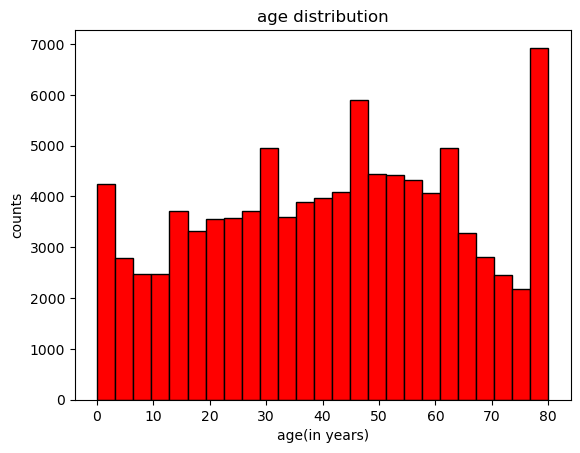

In [16]:
plt.hist(data["age"],bins=25,color="red",edgecolor="black")
plt.title("age distribution")
plt.xlabel("age(in years)")
plt.ylabel("counts")
plt.show()

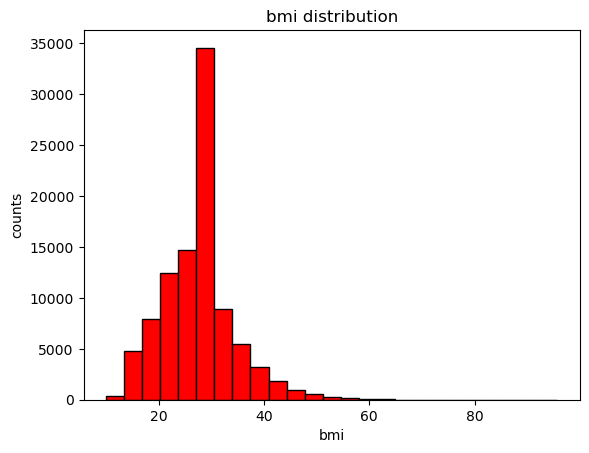

In [17]:
plt.hist(data["bmi"],bins=25,color="red",edgecolor="black")
plt.title("bmi distribution")
plt.xlabel("bmi")
plt.ylabel("counts")
plt.show()

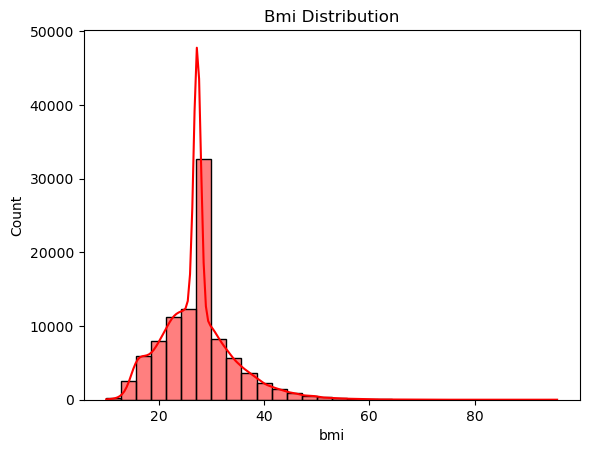

In [18]:
sns.histplot(data["bmi"],kde=True,bins=30,color="red")
plt.title("Bmi Distribution");

## visualizing smoking history in our dataset

Text(0.5, 1.0, 'smoking history')

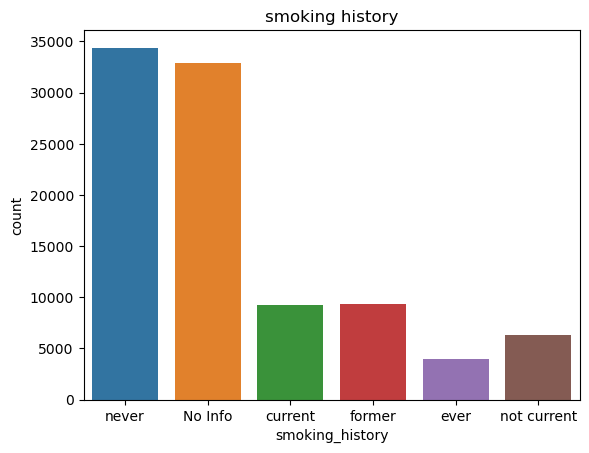

In [19]:
sns.countplot(data,x=data["smoking_history"]) #countplot basically count the categories
plt.title("smoking history")

## visualizing binary problem

In [20]:
data["diabetes"].value_counts()

0    87646
1     8482
Name: diabetes, dtype: int64

## diabetes comparison

<Axes: >

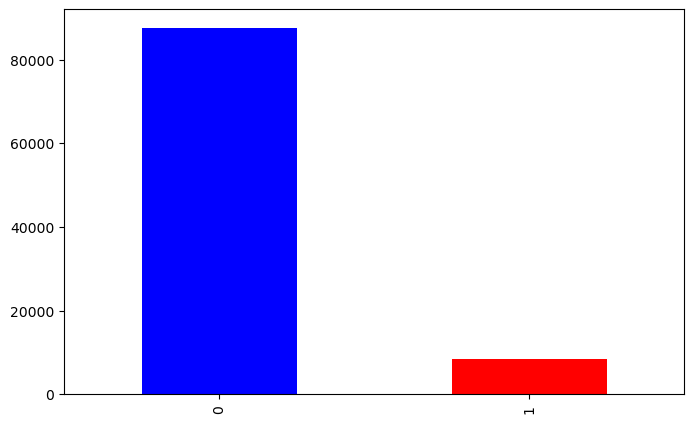

In [21]:
data["diabetes"].value_counts().plot(kind="bar",color=["blue","red"],figsize=(8,5))

## hypertension comparison

<Axes: >

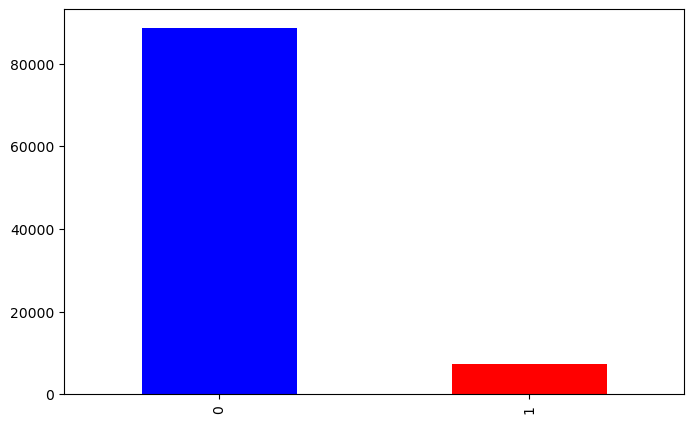

In [22]:
data["hypertension"].value_counts().plot(kind="bar",color=["blue","red"],figsize=(8,5))

## Heart disease comparison

<Axes: >

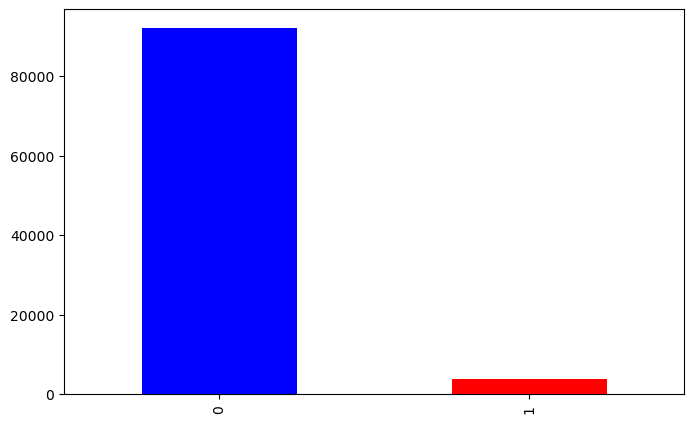

In [23]:
data["heart_disease"].value_counts().plot(kind="bar",color=["blue","red"],figsize=(8,5))

## visualizing age vs diabetes

<Axes: xlabel='diabetes', ylabel='age'>

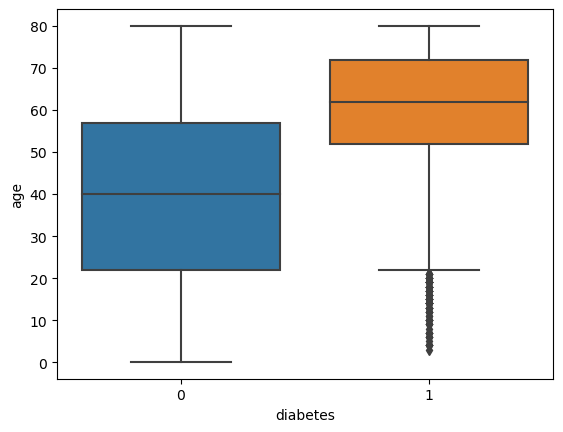

In [24]:
sns.boxplot(data,x=data["diabetes"],y=data["age"])

From this graph we can conclude that most of the patients that have `diabetes` are in the `age` between 52-75

## visualizing BMI vs diabetes

<Axes: xlabel='diabetes', ylabel='bmi'>

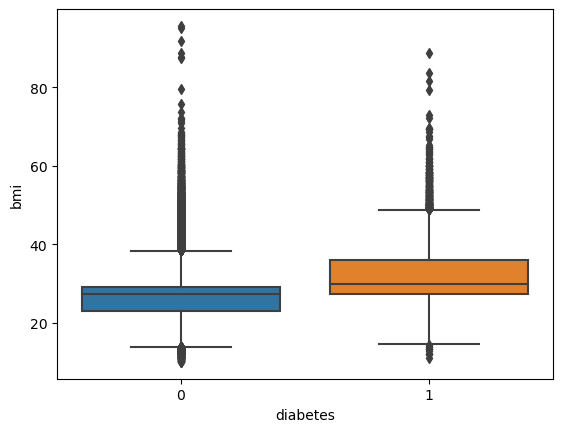

In [25]:
sns.boxplot(data,x=data["diabetes"],y=data["bmi"])

From this graph we can conclude that most patients that have diabetes have `BMI` between `28-40` ( does not mean that patients with higher `BMI` cannot have `diabetes` , this graph just represents for most of the patients , not all of them)

## Visualizing a boxplot between diabetes and blood glucose level

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

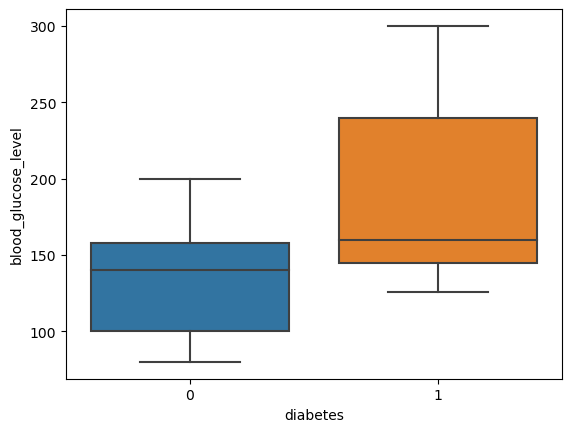

In [26]:
sns.boxplot(data, x=data["diabetes"],y=data["blood_glucose_level"])

From this boxplot we can conclude that most of the patients that have `diabetes` have `blood_glucose_level` between `150-250

## Visualizing a scatterplot between age and bmi

<Axes: xlabel='age', ylabel='bmi'>

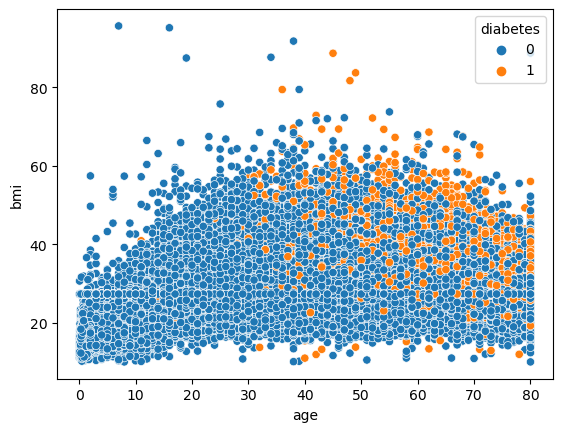

In [27]:
sns.scatterplot(data,x=data["age"],y=data["bmi"],hue=data["diabetes"])

From this graph we can conclude that if the patient age is above 40 and BMI is above 28 , then the chances of diabetes increase drastically

## Visualizing a scatterplot between Blood_glucose_level  and HbA1c_level

<Axes: xlabel='blood_glucose_level', ylabel='HbA1c_level'>

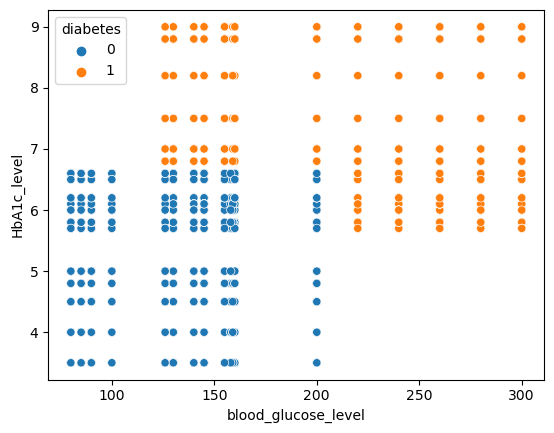

In [28]:
sns.scatterplot(data,x=data["blood_glucose_level"],y=data["HbA1c_level"],hue=data["diabetes"])

## Visualizing a scatterplot between age and blood_glucose_level

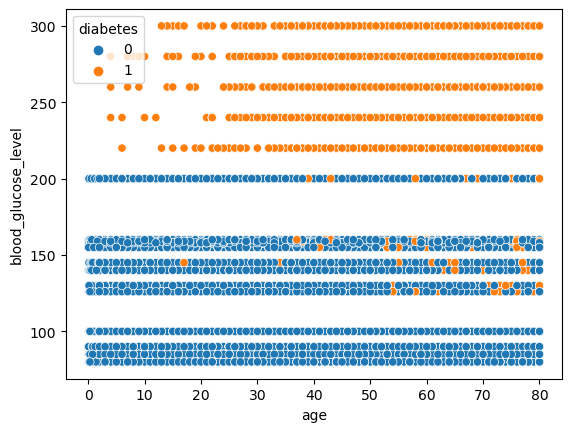

In [29]:
sns.scatterplot(data, x=data["age"],y=data["blood_glucose_level"],hue=data["diabetes"]);

We can without a doubt conclude from this graph that if your blood_glucose_level is above 200 , no matter what the patients age is there is 99-100% probability that the patient has diabetes

One more thing that we can conclude from this graph is that if the patients age is above 50 and has blood_glucose_level between 125-170 there is a chance that the patient might have diabetes

## Visualizing a scatterplot between age  and HbA1c_level

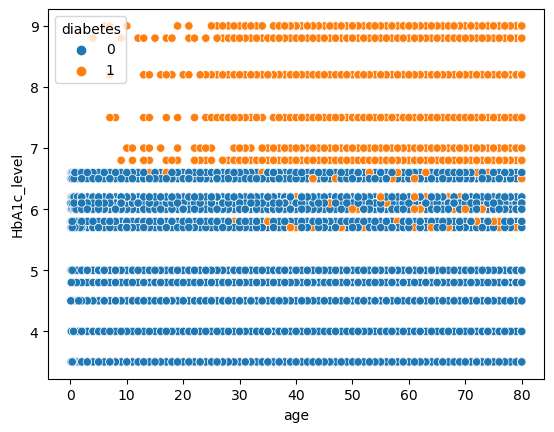

In [30]:
sns.scatterplot(data, x=data["age"],y=data["HbA1c_level"],hue=data["diabetes"]);

We can conclude from this plot that if a patient has over 6.7 HbA1c_level, whatever be the age it is 98-100% probability that a patient has diabetes

Also we can conclude that if a patient has a HbA1c_level above 5.8 and age above 40 chances increase of the patient being diagnosed with diabetes

# Machine learning and predictive analytics

## Prepare the data

importing label encoder to encode the string into 0's and 1's

In [32]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [38]:
data['smoking_history']=LE.fit_transform(data['smoking_history'])


In [39]:
data['gender']=LE.fit_transform(data['gender'])

In [40]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Assign the 8 features to X,and the last column to our classification predictor,y

In [48]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [49]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


### Split:the data set into the training set and test split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

## Normalize

 
Standardizing the data will transform so that its distribution will have a mean of 0 and a standard deviation of 1

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling/Training
We will now Train Various Classification Model on the training set and see which yields the highest accuracy.we will compare the accuracy of

Logistic Regression

K-NN

SVM

Naives Bayes Classifier

Decision Trees

Random Forest

Note: these are all supervised learning model


# Model 1: Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model=LogisticRegression()

In [57]:
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
from sklearn.metrics import classification_report

model1=LogisticRegression(random_state=1)#get instance of model
model1.fit(X_train,y_train)#train/fit model

y_pred1=model1.predict(X_test)#get y predictions
print(classification_report(y_test,y_pred1))#output accuracy

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17453
           1       0.87      0.63      0.73      1773

    accuracy                           0.96     19226
   macro avg       0.92      0.81      0.85     19226
weighted avg       0.95      0.96      0.95     19226



## Accuracy 96%

# Model2:K-NN(K-Nearest Neighbors)

In [61]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model2=KNeighborsClassifier()#get instance of model
model2.fit(X_train,y_train) #Train/fit model

y_pred2=model2.predict(X_test)#get y predictions
print(classification_report(y_test,y_pred2)) #output accuracy

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17453
           1       0.90      0.62      0.73      1773

    accuracy                           0.96     19226
   macro avg       0.93      0.81      0.86     19226
weighted avg       0.96      0.96      0.96     19226



## Accuracy 96%

# Model3: SVM(support vector machine)

In [62]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model3=SVC(random_state=1)#get instance of model
model3.fit(X_train,y_train) #Train/fit model

y_pred3=model3.predict(X_test)#get y predictions
print(classification_report(y_test,y_pred3)) #output accuracy

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17453
           1       0.97      0.58      0.73      1773

    accuracy                           0.96     19226
   macro avg       0.97      0.79      0.85     19226
weighted avg       0.96      0.96      0.96     19226



## accuracy 96%

# Model 4: Naives Bayes classifier

In [63]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

model4=GaussianNB()
model4.fit(X_train,y_train)

y_pred4=model4.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     17453
           1       0.47      0.64      0.54      1773

    accuracy                           0.90     19226
   macro avg       0.71      0.78      0.74     19226
weighted avg       0.92      0.90      0.91     19226



## Accuracy 90%

# Model5: Decision Trees

In [64]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model5=DecisionTreeClassifier(random_state=1)#get instance of model
model5.fit(X_train,y_train) #Train/fit model

y_pred5=model5.predict(X_test)#get y predictions
print(classification_report(y_test,y_pred5)) #output accuracy

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17453
           1       0.71      0.73      0.72      1773

    accuracy                           0.95     19226
   macro avg       0.84      0.85      0.84     19226
weighted avg       0.95      0.95      0.95     19226



## Accuracy 95%

# Model6: Random Forest

In [65]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model6=RandomForestClassifier(random_state=1)#get instance of model
model6.fit(X_train,y_train) #Train/fit model

y_pred6=model6.predict(X_test)#get y predictions
print(classification_report(y_test,y_pred6)) #output accuracy

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17453
           1       0.95      0.68      0.79      1773

    accuracy                           0.97     19226
   macro avg       0.96      0.84      0.89     19226
weighted avg       0.97      0.97      0.96     19226



## Accuracy 97%

# Model7:XGBoost

In [66]:
!pip install xgboost

In [68]:
import xgboost as xgb
from xgboost import XGBClassifier

model7=XGBClassifier(random_state=1)#get instance of model
model7.fit(X_train,y_train) #Train/fit model

y_pred7=model7.predict(X_test)#get y predictions
print(classification_report(y_test,y_pred7)) #output accuracy

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17453
           1       0.96      0.69      0.80      1773

    accuracy                           0.97     19226
   macro avg       0.96      0.84      0.89     19226
weighted avg       0.97      0.97      0.97     19226



In [73]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


## Accuracy 97%

### From comparing the 7 models,we can conclude that model 6 :Random Forest and model 7: XGBoost yields the highest accuracy.with an accuracy 97%
  